## Projet de segmentation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importation et exploration du jeu de donnée

In [4]:
df = pd.read_csv("D:/Projet road Natacha/Projet de segmentation/Mall_Customers.csv")

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df= df.drop(columns="CustomerID")

Nous supprimons la colonne CustomerID car elle nous est pas utile dans notre étude,Aussi nous remarquons par le code df.info() que notre jeu de donnée contient 200 lignes et aucune valeurs nulles dans tout le jeu de donnée

##### Statistique descriptive

In [10]:
df_num= df.select_dtypes(include="int64")
df_num.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
df["Gender"].describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

Nous allons visualiser les relations entre les variables

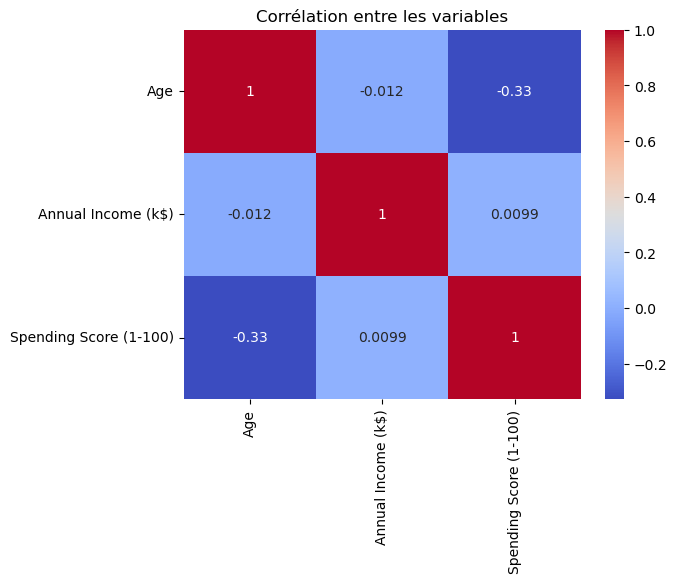

In [13]:
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre les variables")
plt.show()

Nous voyons ici que les variables numeriques ne sont pas vraiment lié, c'est bon signe pour le clustering car nous voulons des variables qui indépendantes. Nous avons exclu la variable gender du travail car elle est qualitatives.

#### Passons à la standarisation des données 

Ici nous standarisons les donées car elle est plus adapté pour les méthodes de Clustering

In [17]:
from sklearn.preprocessing import StandardScaler

X_num = df_num

# 2. Création d'un standardiseur
scaler = StandardScaler()

# 3. Application de la standardisation
X_scaled = scaler.fit_transform(X_num)

# recréer un DataFrame pour mieux visualiser
df_scaled = pd.DataFrame(X_scaled, columns=X_num.columns)
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Segmentation avec Kmeans

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

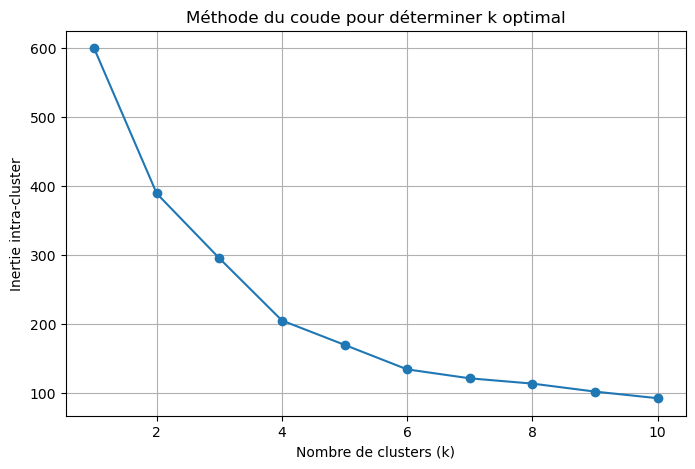

In [19]:
from sklearn.cluster import KMeans
# Tester différents k (1 à 10)
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title('Méthode du coude pour déterminer k optimal')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie intra-cluster')
plt.grid(True)
plt.show()

ici le nombre de Cluster optimal semble etre 4 car c'est après lui que le la difference n'est plus énorme

In [21]:
# Appliquer KMeans avec k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajouter les étiquettes de cluster aux données
df_clustered = df_num.copy()
df_clustered['Cluster'] = clusters

# Afficher un aperçu
print(df_clustered.head())

   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        2
1   21                  15                      81        2
2   20                  16                       6        2
3   23                  16                      77        2
4   31                  17                      40        2


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


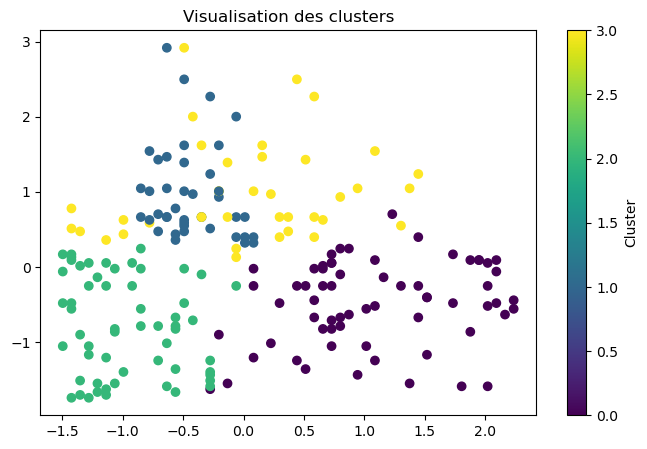

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('Visualisation des clusters')
plt.colorbar(label='Cluster')
plt.show()

In [23]:
df_clustered.groupby('Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


Nous avons donc 4 clusters et ces se ditingues comme ça par la moyenne

In [25]:
df_clustered0 = df.copy()
df_clustered0['Cluster'] = clusters
df_clustered0.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


Voila le cluster de chaque individu dans le dataframe de base

#### Visualisation en 2D POUR VERIFIER SI LE CLUSTERING EST PARFAIT

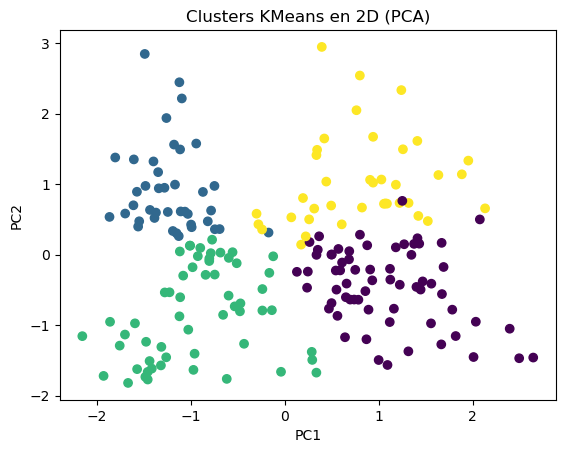

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters KMeans en 2D (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Segmentation avec CAH

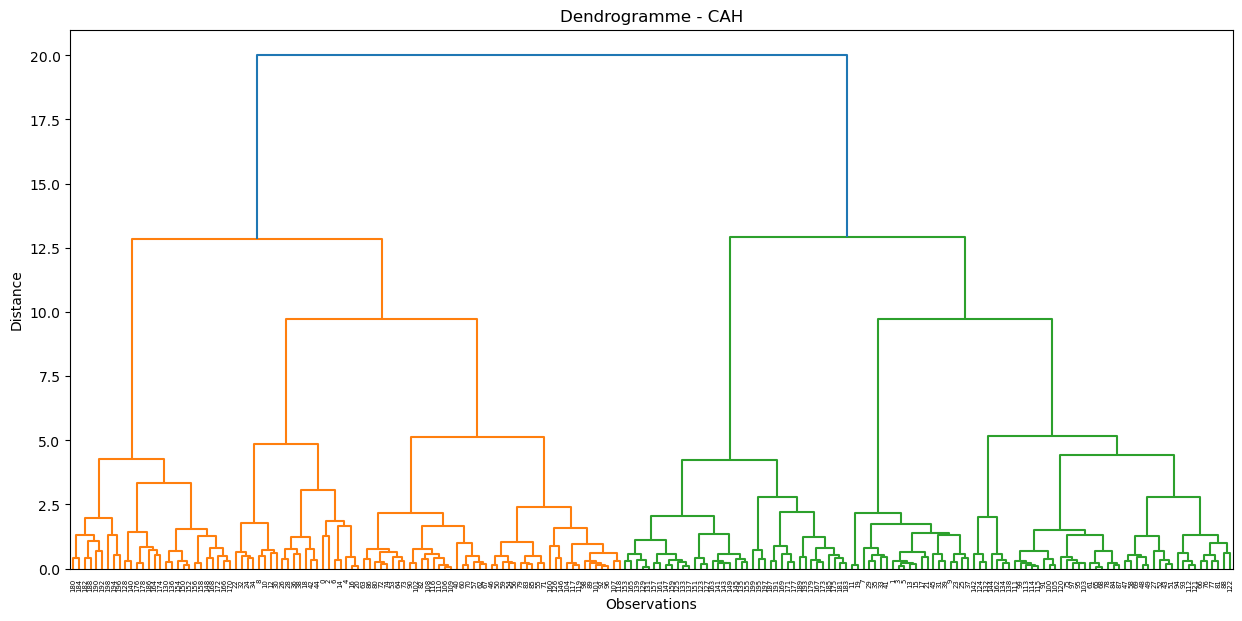

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# Calculer la matrice de lien avec la méthode 'ward' 
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 7))
plt.title("Dendrogramme - CAH")
dendrogram(Z)
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

In [31]:
## Creation des clusters (Nous allons prendre 4)
clusters_cah = fcluster(Z, t=4, criterion='maxclust')
## Copie dans le dataframe
df_clustered_cah = df.copy()
df_clustered_cah['Cluster_CAH'] = clusters_cah

In [32]:
df_clustered_cah 

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_CAH
0,Male,19,15,39,2
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,3
196,Female,45,126,28,1
197,Male,32,126,74,3
198,Male,32,137,18,1


In [33]:
df_clustered_cah.select_dtypes(include='number').groupby('Cluster_CAH').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_CAH,,,
1,43.892857,91.285714,16.678571
2,52.432836,45.597015,39.134328
3,32.692308,86.538462,82.128205
4,26.560606,47.363636,56.787879


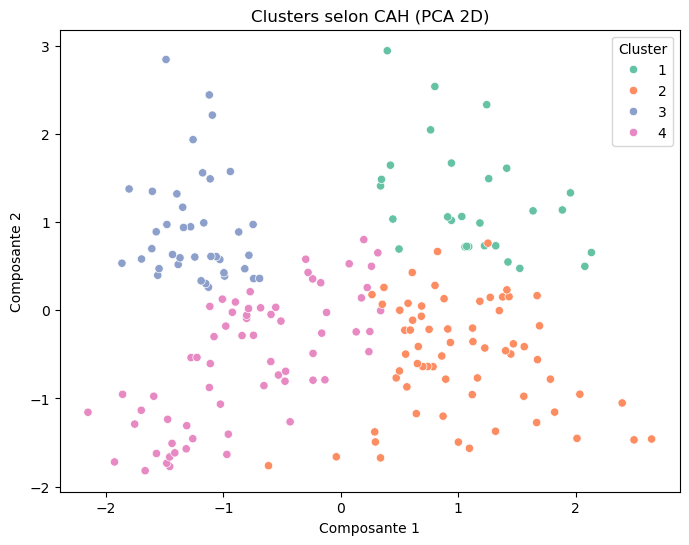

In [34]:
## Visualition en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_cah, palette='Set2')
plt.title('Clusters selon CAH (PCA 2D)')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.legend(title='Cluster')
plt.show()

### Comparaison des segmentation pour choisir la plus optimale

Silhouette Kmean

In [37]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=42)  # ajuste n_clusters selon ton analyse
kmeans_labels = kmeans.fit_predict(X_scaled)

sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
print("Silhouette score K-means :", sil_kmeans)


Silhouette score K-means : 0.4039582785148566


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette CAH

In [65]:
from sklearn.cluster import AgglomerativeClustering

cah = AgglomerativeClustering(n_clusters=4)  # ajuste n_clusters si besoin
cah_labels = cah.fit_predict(X_scaled)

sil_cah = silhouette_score(X_scaled, cah_labels)
print("Silhouette score CAH :", sil_cah)

Silhouette score CAH : 0.3614512741691407


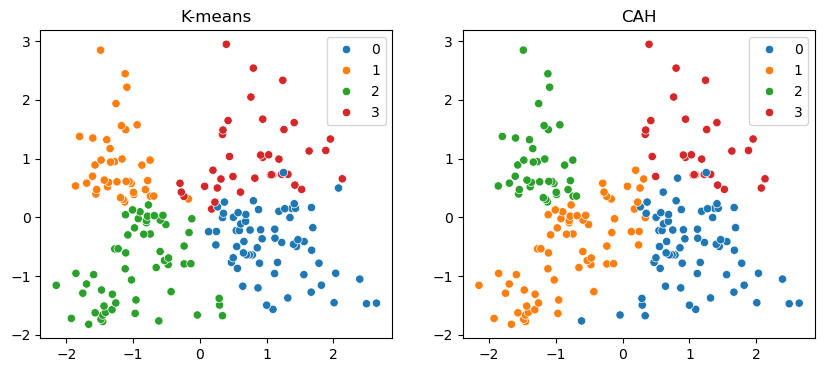

In [67]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Affichage K-means
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='tab10')
plt.title("K-means")

# Affichage CAH
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cah_labels, palette='tab10')
plt.title("CAH")
plt.show()

Nous voyons de par le resultats des silhouette et aussi par les graphique que la méthode de Kmeans montre des regroupements plus cohérents